In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model,load_model
from keras import models
from tools import eval_tool as tls

In [2]:
#(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
(train_images_rbg, train_labels), (test_images_rbg, test_labels) = cifar10.load_data()
train_images = 0.299 * train_images_rbg[:, :, :, 2] + 0.587 * train_images_rbg[:, :, :, 1] + 0.114 * train_images_rbg[:, :, :, 0]
test_images = 0.299 * test_images_rbg[:, :, :, 2] + 0.587 * test_images_rbg[:, :, :, 1] + 0.114 * test_images_rbg[:, :, :, 0]
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# データセットのサイズをチェック
print(train_images.shape)
 
# (60000, 28, 28)
 
print(test_images.shape)

print(test_images[1][1][1])
# (10000, 28, 28)
 
train_images = train_images / 255.0
 
test_images = test_images / 255.0

(50000, 32, 32)
(10000, 32, 32)
234.99999999999997


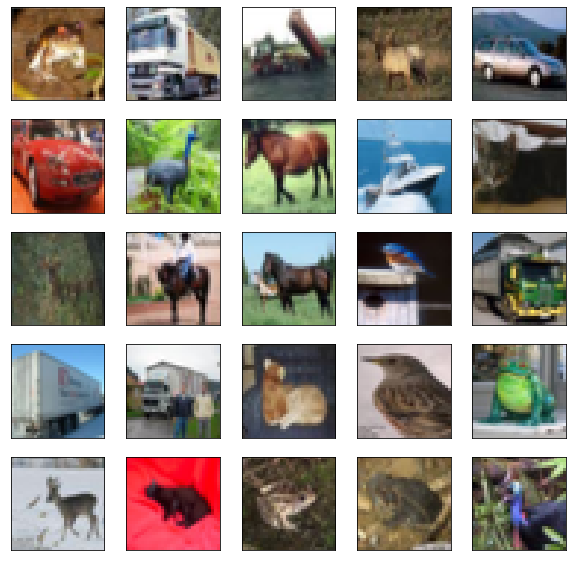

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images_rbg[i])

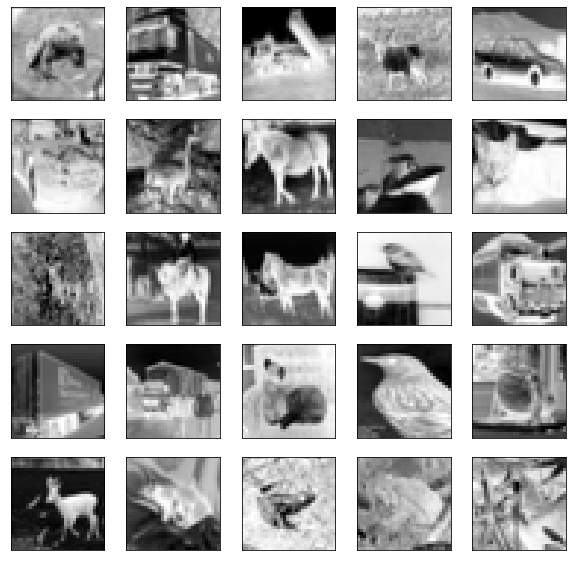

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)

In [5]:
model = keras.Sequential([
    keras.layers.Dense(32*32, activation=tf.nn.relu, name="in" ,input_dim=32*32),
    keras.layers.Dense(256, activation=tf.nn.relu, name="encoder"),
    keras.layers.Dense(32*32, activation=tf.nn.sigmoid, name="out")
])

In [6]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['mean_squared_error','binary_crossentropy'])

In [7]:
x_train = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
x_test = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
 
model.fit(x_train, x_train, epochs=40, batch_size=128)

Epoch 1/40
391/391 [==============================] - 9s 24ms/step - loss: 0.6239 - mean_squared_error: 0.0269 - binary_crossentropy: 0.6239
Epoch 2/40
391/391 [==============================] - 9s 24ms/step - loss: 0.5937 - mean_squared_error: 0.0138 - binary_crossentropy: 0.5937
Epoch 3/40
391/391 [==============================] - 9s 24ms/step - loss: 0.5872 - mean_squared_error: 0.0111 - binary_crossentropy: 0.5872
Epoch 4/40
391/391 [==============================] - 10s 24ms/step - loss: 0.5846 - mean_squared_error: 0.0100 - binary_crossentropy: 0.5846
Epoch 5/40
391/391 [==============================] - 10s 24ms/step - loss: 0.5819 - mean_squared_error: 0.0089 - binary_crossentropy: 0.5819
Epoch 6/40
391/391 [==============================] - 10s 25ms/step - loss: 0.5806 - mean_squared_error: 0.0084 - binary_crossentropy: 0.5806
Epoch 7/40
391/391 [==============================] - 10s 27ms/step - loss: 0.5793 - mean_squared_error: 0.0078 - binary_crossentropy: 0.5793
Epoch 8/4

In [8]:
#エンコーダとなる部分の情報を取り出す
middle_model = Model(inputs=model.input, outputs=model.get_layer("encoder").output)
#取り出したエンコーダを使って推定(→画像圧縮)
middle_output = middle_model.predict(x_test)

(10000, 256)


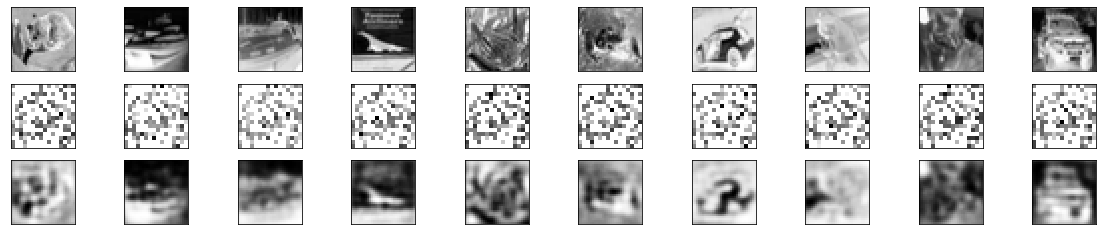

In [9]:
#学習モデルを使った推定(エンコード→デコード)
x_recon = model.predict(x_test)

#画像のプロット(圧縮前、圧縮後、複合後)
n_images = 10
plt.figure(figsize=(20, 4))
for i in range(n_images):
    # テストデータのオリジナルを表示
    ax = plt.subplot(3, n_images, i+1)
    plt.imshow(x_test[i].reshape(32, 32), cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # オートエンコーダによって圧縮されたものを表示
    ax = plt.subplot(3, n_images, i+1+n_images)
    plt.imshow(middle_output[i].reshape(16, 16), cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # テストデータのデコードしたものを表示
    ax = plt.subplot(3, n_images, i+1+n_images*2)
    plt.imshow(x_recon[i].reshape(32, 32), cmap=plt.cm.binary)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [10]:
#PSNRの算出
for i in range(10):
    print(tls.psnr(x_test[i],x_recon[i],1))

22.33909457386082
22.765904062213274
24.914452779428544
24.00593262668489
22.04021086014482
25.199706112072104
22.41450553311133
26.480086007874974
24.05912233305714
22.173038267042887
